In [1]:
!date

dom dic  1 22:39:27 CET 2019


In [2]:
# Active system's automagic
%automagic on


Automagic is ON, % prefix IS NOT needed for line magics.


In [3]:
# Load work environment

In [4]:
import os
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/03_Presentation'

In [5]:
folder = '/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/03_Presentation'
!ls {folder}

01_loading_and_preprocessing_original_data_sample.ipynb
01_OUT_csv_filesexport_df_series_tiempo.csv
02_loading_and_preprocessing_original_data_complete.ipynb
02_OUT_csv_filesexport_datos_accs_madrid.csv
02_OUT_csv_filesexport_time_series_complete.csv
03_final_adjustments_training_and_prediction_ML.ipynb


In [6]:
os.chdir(folder)
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/03_Presentation'

In [7]:
!ls -ltr 02_OUT_csv_filesexport_datos_accs_madrid.csv

-rw-rw-r-- 1 dsc dsc 24017454 dic  1 20:36 02_OUT_csv_filesexport_datos_accs_madrid.csv


In [8]:
# Load library for work and analitics data in ML
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [9]:
df_accs = pd.read_csv("02_OUT_csv_filesexport_datos_accs_madrid.csv")

In [10]:
# Initial Exploratory Analysis
# Now let's see how many columns and records we have:
df_accs.shape

(252998, 11)

In [11]:
df_accs.head(3)

,FECHA,HORA,DIA_SEMANA,DISTRITO,NUM_PERSONAS,TIPO_ACCIDENTE,TIPO_VEHICULO,TIPO_PERSONA,SEXO,LESIVIDAD,EDAD_APROX
0,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,20
1,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,CONDUCTOR,HOMBRE,INGRESO_LEVE,50
2,01/01/2010,00:00,VIERNES,CHAMARTIN,1,COLISION_DOBLE,TURISMO,VIAJERO,MUJER,HERIDO_LEVE,40


In [12]:
df_accs.dtypes

FECHA             object
HORA              object
DIA_SEMANA        object
DISTRITO          object
NUM_PERSONAS       int64
TIPO_ACCIDENTE    object
TIPO_VEHICULO     object
TIPO_PERSONA      object
SEXO              object
LESIVIDAD         object
EDAD_APROX        object
dtype: object

In [13]:
# Delete surplus columns
drop_elements = ['FECHA', 'NUM_PERSONAS', 'TIPO_ACCIDENTE', 'TIPO_VEHICULO', 'TIPO_PERSONA', 'LESIVIDAD']
df_accs = df_accs.drop(drop_elements, axis = 1)

In [14]:
# Some visualizations to better understand the data.
# Look at label balancing

In [15]:
# Check NULL values
df_accs.isnull().sum()

HORA          0
DIA_SEMANA    0
DISTRITO      0
SEXO          0
EDAD_APROX    0
dtype: int64

In [16]:
# Group data columns individually per size

In [17]:
df_accs.groupby('HORA').size()

HORA
00:00     4729
01:00     3602
02:00     2776
03:00     2431
04:00     2131
05:00     2225
06:00     3992
07:00     6428
08:00    11759
09:00    14348
10:00    11561
11:00    12492
12:00    14473
13:00    15921
14:00    18232
15:00    14557
16:00    13590
17:00    14137
18:00    16259
19:00    18049
20:00    17244
21:00    14113
22:00    10758
23:00     7191
dtype: int64

In [18]:
df_accs.groupby('DIA_SEMANA').size()

DIA_SEMANA
DOMINGO      27249
JUEVES       38794
LUNES        36301
MARTES       37707
MIERCOLES    38697
SABADO       30798
VIERNES      43452
dtype: int64

In [19]:
df_accs.groupby('DISTRITO').size()

DISTRITO
ARGANZUELA             13050
BARAJAS                 3402
CARABANCHEL            15593
CENTRO                 17717
CHAMARTIN              18857
CHAMBERI               14466
CIUDAD LINEAL          16580
FUENCARRAL-EL PARDO    13750
HORTALEZA               8546
LATINA                 12218
MONCLOA-ARAVACA        13587
MORATALAZ               6246
PUENTE DE VALLECAS     16180
RETIRO                 13665
SALAMANCA              19269
SAN BLAS               11987
TETUAN                 13626
USERA                   8808
VICALVARO               3142
VILLA DE VALLECAS       5601
VILLAVERDE              6708
dtype: int64

In [20]:
df_accs.groupby('SEXO').size()

SEXO
HOMBRE         160165
MUJER           80717
NO_ASIGNADO     12116
dtype: int64

In [21]:
df_accs.groupby('EDAD_APROX').size()

EDAD_APROX
0               3128
10              5124
15              2593
20              9304
25             49329
30             31110
35             30169
40             26421
45             22167
50             17999
55             12454
65             13459
70              3656
75              6361
NO_ASIGNADO    19724
dtype: int64

In [22]:
# Review how many rows are there according to "DIA_SEMANA", how central variable.

In [23]:
df_accs.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

In [24]:
# Draw the columns individually by grouped size counter and per pairs

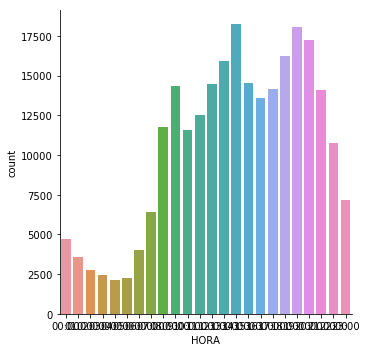

In [25]:
sb.catplot('HORA',data=df_accs,kind="count", \
           order=['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', \
                  '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', \
                  '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', \
                  '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']
          )

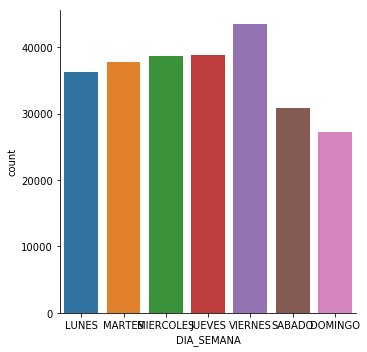

In [26]:
sb.catplot('DIA_SEMANA',data=df_accs,kind="count", \
           order=['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO', 'DOMINGO']
          )

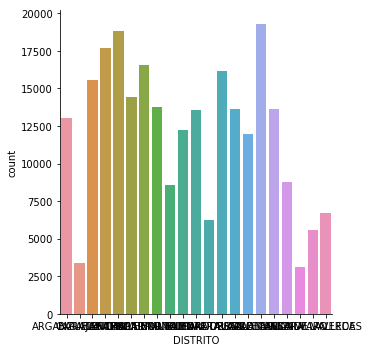

In [27]:
sb.catplot('DISTRITO',data=df_accs,kind="count", \
           order = ['ARGANZUELA', 'BARAJAS', 'CARABANCHEL', 'CENTRO', 'CHAMARTIN', \
                    'CHAMBERI', 'CIUDAD LINEAL', 'FUENCARRAL-EL PARDO', 'HORTALEZA', \
                    'LATINA', 'MONCLOA-ARAVACA', 'MORATALAZ', 'PUENTE DE VALLECAS', \
                    'RETIRO', 'SAN BLAS', 'SALAMANCA', 'TETUAN', 'USERA', 'VICALVARO', \
                    'VILLA DE VALLECAS', 'VILLAVERDE']
          )

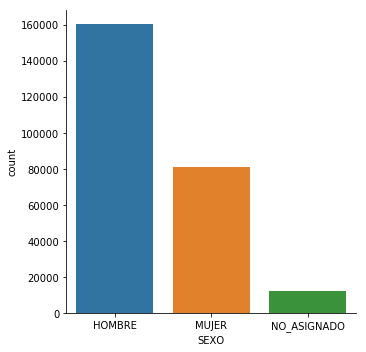

In [28]:
sb.catplot('SEXO',data=df_accs,kind="count", \
           order = ['HOMBRE', 'MUJER', 'NO_ASIGNADO']
          )

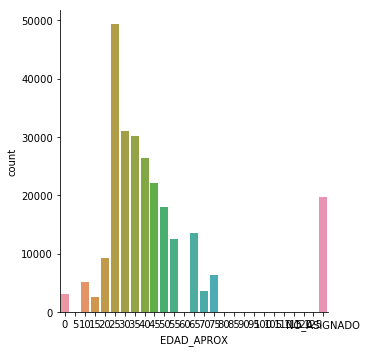

In [29]:
sb.catplot('EDAD_APROX',data=df_accs,kind="count", \
           order = ['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', \
                    '55', '60', '65', '70', '75', '80', '85', '90', '95', '100', \
                    '105', '110', '115', '120', '125', 'NO_ASIGNADO']
          )

In [30]:
df_accs.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

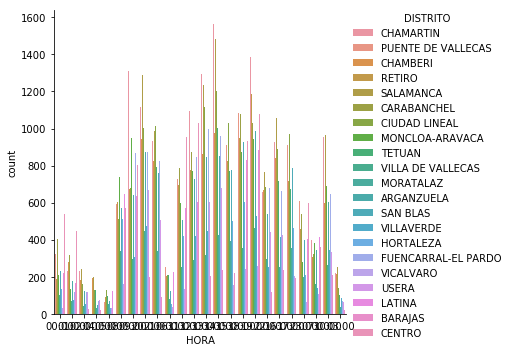

In [31]:
sb.catplot('HORA',data=df_accs,hue='DISTRITO',kind="count")

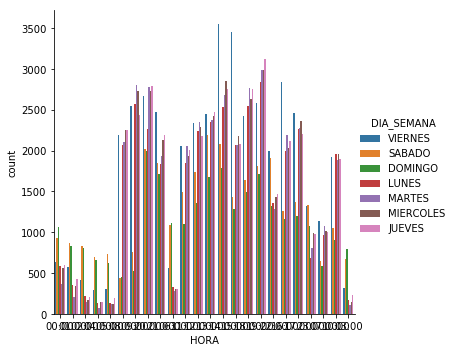

In [32]:
sb.catplot('HORA',data=df_accs,hue='DIA_SEMANA',kind="count")

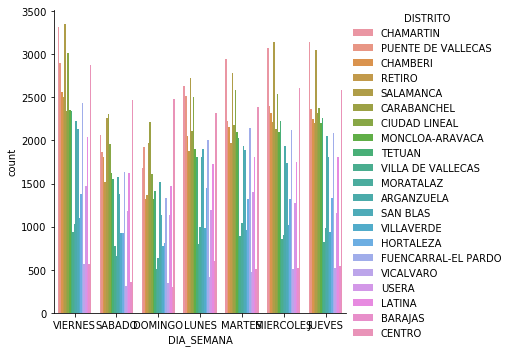

In [33]:
sb.catplot('DIA_SEMANA',data=df_accs,hue='DISTRITO',kind="count")

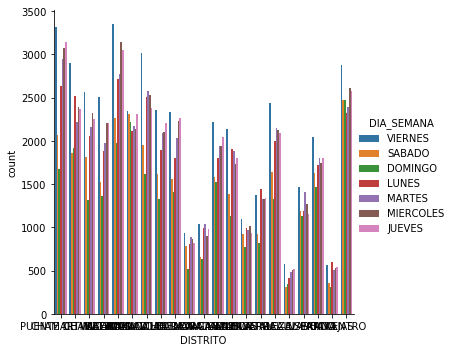

In [34]:
sb.catplot('DISTRITO',data=df_accs,hue='DIA_SEMANA',kind="count")

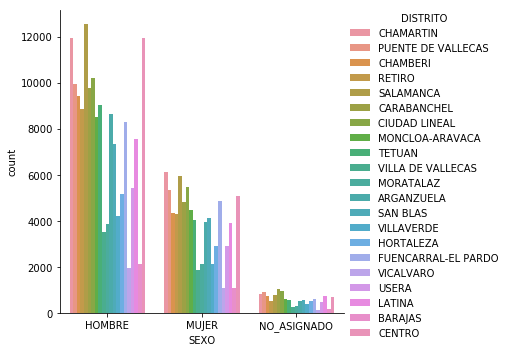

In [35]:
sb.catplot('SEXO',data=df_accs,hue='DISTRITO',kind="count")

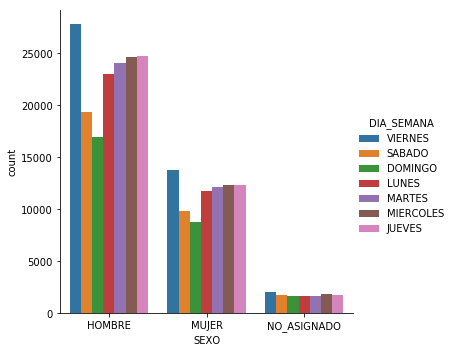

In [36]:
sb.catplot('SEXO',data=df_accs,hue='DIA_SEMANA',kind="count")

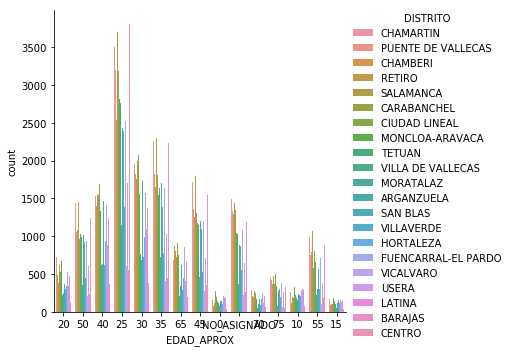

In [37]:
sb.catplot('EDAD_APROX',data=df_accs,hue='DISTRITO',kind="count")

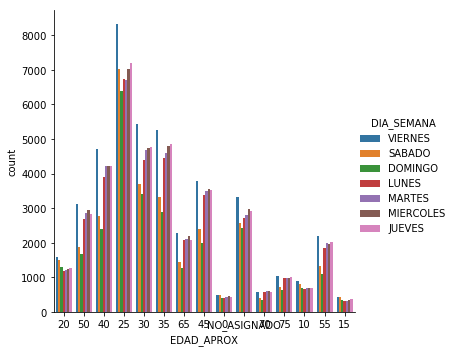

In [38]:
sb.catplot('EDAD_APROX',data=df_accs,hue='DIA_SEMANA',kind="count")

In [39]:
# Draw some dispersion graph for columns pairs to visualize the lack of information

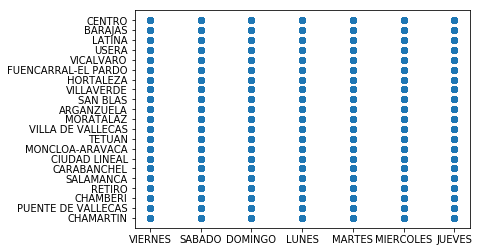

In [40]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['DISTRITO'].values)
plt.show()

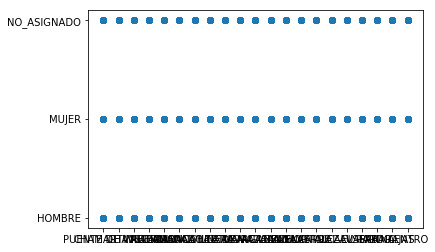

In [41]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['SEXO'].values)
plt.show()

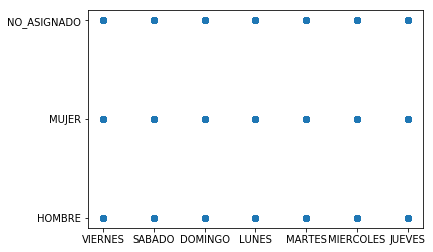

In [42]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['SEXO'].values)
plt.show()

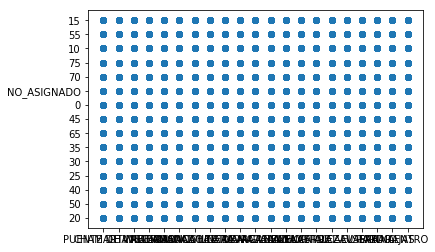

In [43]:
plt.scatter(df_accs['DISTRITO'].values, df_accs['EDAD_APROX'].values)
plt.show()

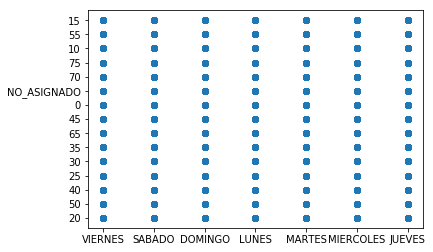

In [44]:
plt.scatter(df_accs['DIA_SEMANA'].values, df_accs['EDAD_APROX'].values)
plt.show()

In [45]:
# Data mapping

In [46]:
df_accs_lab_ohe = df_accs.reset_index(drop=True).copy()

In [47]:
df_accs.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20


In [48]:
df_accs_lab_ohe.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20


In [49]:
df_accs.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

In [50]:
df_accs_lab_ohe.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

In [51]:
df_accs.dtypes

HORA          object
DIA_SEMANA    object
DISTRITO      object
SEXO          object
EDAD_APROX    object
dtype: object

In [52]:
df_accs_lab_ohe.dtypes

HORA          object
DIA_SEMANA    object
DISTRITO      object
SEXO          object
EDAD_APROX    object
dtype: object

In [53]:
df_accs_lab_ohe.head(3)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20
1,00:00,VIERNES,CHAMARTIN,HOMBRE,50
2,00:00,VIERNES,CHAMARTIN,MUJER,40


In [54]:
# Check UNIQUE values
df_accs_lab_ohe['DISTRITO'].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [55]:
# Check NULL values
df_accs_lab_ohe.isnull().sum()

HORA          0
DIA_SEMANA    0
DISTRITO      0
SEXO          0
EDAD_APROX    0
dtype: int64

In [56]:
# Create sample for new dataframe with labeler and OneHotEncoder

In [57]:
df_accs_lab_ohe_sample = df_accs_lab_ohe.sample(n=10000).reset_index(drop=True)

In [58]:
df_accs_lab_ohe_sample.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

In [59]:
df_accs_lab_ohe_sample.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,19:00,JUEVES,HORTALEZA,MUJER,50


In [60]:
df_accs_lab_ohe_sample.dtypes

HORA          object
DIA_SEMANA    object
DISTRITO      object
SEXO          object
EDAD_APROX    object
dtype: object

In [61]:
# Create sample dummy dataframe for get_dummies function

In [62]:
df_accs_dumm_sample = pd.get_dummies(df_accs_lab_ohe_sample, drop_first=True)

In [63]:
df_accs_dumm_sample.shape

(10000, 65)

In [64]:
df_accs_dumm_sample.head(1)

,HORA_01:00,HORA_02:00,HORA_03:00,HORA_04:00,HORA_05:00,HORA_06:00,HORA_07:00,HORA_08:00,HORA_09:00,HORA_10:00,...,EDAD_APROX_30,EDAD_APROX_35,EDAD_APROX_40,EDAD_APROX_45,EDAD_APROX_50,EDAD_APROX_55,EDAD_APROX_65,EDAD_APROX_70,EDAD_APROX_75,EDAD_APROX_NO_ASIGNADO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [65]:
# Check NULL values
df_accs_lab_ohe_sample.isnull().sum()

HORA          0
DIA_SEMANA    0
DISTRITO      0
SEXO          0
EDAD_APROX    0
dtype: int64

In [66]:
# Check NULL values
df_accs_dumm_sample.isnull().sum()

HORA_01:00                0
HORA_02:00                0
HORA_03:00                0
HORA_04:00                0
HORA_05:00                0
                         ..
EDAD_APROX_55             0
EDAD_APROX_65             0
EDAD_APROX_70             0
EDAD_APROX_75             0
EDAD_APROX_NO_ASIGNADO    0
Length: 65, dtype: int64

In [67]:
# Dont limit column display
import pandas as pd
from IPython.display import display

pd.options.display.max_columns = None
display(df_accs_dumm_sample.head(1))

,HORA_01:00,HORA_02:00,HORA_03:00,HORA_04:00,HORA_05:00,HORA_06:00,HORA_07:00,HORA_08:00,HORA_09:00,HORA_10:00,HORA_11:00,HORA_12:00,HORA_13:00,HORA_14:00,HORA_15:00,HORA_16:00,HORA_17:00,HORA_18:00,HORA_19:00,HORA_20:00,HORA_21:00,HORA_22:00,HORA_23:00,DIA_SEMANA_JUEVES,DIA_SEMANA_LUNES,DIA_SEMANA_MARTES,DIA_SEMANA_MIERCOLES,DIA_SEMANA_SABADO,DIA_SEMANA_VIERNES,DISTRITO_BARAJAS,DISTRITO_CARABANCHEL,DISTRITO_CENTRO,DISTRITO_CHAMARTIN,DISTRITO_CHAMBERI,DISTRITO_CIUDAD LINEAL,DISTRITO_FUENCARRAL-EL PARDO,DISTRITO_HORTALEZA,DISTRITO_LATINA,DISTRITO_MONCLOA-ARAVACA,DISTRITO_MORATALAZ,DISTRITO_PUENTE DE VALLECAS,DISTRITO_RETIRO,DISTRITO_SALAMANCA,DISTRITO_SAN BLAS,DISTRITO_TETUAN,DISTRITO_USERA,DISTRITO_VICALVARO,DISTRITO_VILLA DE VALLECAS,DISTRITO_VILLAVERDE,SEXO_MUJER,SEXO_NO_ASIGNADO,EDAD_APROX_10,EDAD_APROX_15,EDAD_APROX_20,EDAD_APROX_25,EDAD_APROX_30,EDAD_APROX_35,EDAD_APROX_40,EDAD_APROX_45,EDAD_APROX_50,EDAD_APROX_55,EDAD_APROX_65,EDAD_APROX_70,EDAD_APROX_75,EDAD_APROX_NO_ASIGNADO
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [68]:
display(df_accs_dumm_sample.columns)

Index(['HORA_01:00', 'HORA_02:00', 'HORA_03:00', 'HORA_04:00', 'HORA_05:00',
       'HORA_06:00', 'HORA_07:00', 'HORA_08:00', 'HORA_09:00', 'HORA_10:00',
       'HORA_11:00', 'HORA_12:00', 'HORA_13:00', 'HORA_14:00', 'HORA_15:00',
       'HORA_16:00', 'HORA_17:00', 'HORA_18:00', 'HORA_19:00', 'HORA_20:00',
       'HORA_21:00', 'HORA_22:00', 'HORA_23:00', 'DIA_SEMANA_JUEVES',
       'DIA_SEMANA_LUNES', 'DIA_SEMANA_MARTES', 'DIA_SEMANA_MIERCOLES',
       'DIA_SEMANA_SABADO', 'DIA_SEMANA_VIERNES', 'DISTRITO_BARAJAS',
       'DISTRITO_CARABANCHEL', 'DISTRITO_CENTRO', 'DISTRITO_CHAMARTIN',
       'DISTRITO_CHAMBERI', 'DISTRITO_CIUDAD LINEAL',
       'DISTRITO_FUENCARRAL-EL PARDO', 'DISTRITO_HORTALEZA', 'DISTRITO_LATINA',
       'DISTRITO_MONCLOA-ARAVACA', 'DISTRITO_MORATALAZ',
       'DISTRITO_PUENTE DE VALLECAS', 'DISTRITO_RETIRO', 'DISTRITO_SALAMANCA',
       'DISTRITO_SAN BLAS', 'DISTRITO_TETUAN', 'DISTRITO_USERA',
       'DISTRITO_VICALVARO', 'DISTRITO_VILLA DE VALLECAS',
       'DISTRI

In [69]:
print(pd.options.display.max_columns)

None


In [70]:
print(pd.options.display.max_rows)

60


In [71]:
df_accs_lab_ohe_sample.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

In [72]:
df_accs_lab_ohe_sample[0:1]

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,19:00,JUEVES,HORTALEZA,MUJER,50


# Data Preparation

In [73]:
# Load variables with sample data
X = np.array(df_accs_lab_ohe_sample.drop('DISTRITO', 1))
y = np.array(df_accs_lab_ohe_sample["DISTRITO"])
X.shape

(10000, 4)

In [74]:
df_accs_lab_ohe_sample.dtypes

HORA          object
DIA_SEMANA    object
DISTRITO      object
SEXO          object
EDAD_APROX    object
dtype: object

In [75]:
# Train-test split and load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [76]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X_train)    # Assume for simplicity all features are categorical.

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [78]:
# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [79]:
X.shape

(10000, 4)

In [80]:
X_train.shape

(8000, 49)

In [81]:
X_test.shape

(2000, 49)

In [82]:
X[0]

array(['19:00', 'JUEVES', 'MUJER', '50'], dtype=object)

In [83]:
X_train[0]

<1x49 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [84]:
X_test[0]

<1x49 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [85]:
df_accs_lab_ohe_sample.head(3)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,19:00,JUEVES,HORTALEZA,MUJER,50
1,08:00,MIERCOLES,FUENCARRAL-EL PARDO,HOMBRE,40
2,18:00,MIERCOLES,PUENTE DE VALLECAS,MUJER,25


In [86]:
# Create a new dataframe for labeler data only

In [87]:
df_accs_lab_sample = df_accs_lab_ohe_sample.reset_index(drop=True)

In [88]:
df_accs_lab_sample.head(3)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,19:00,JUEVES,HORTALEZA,MUJER,50
1,08:00,MIERCOLES,FUENCARRAL-EL PARDO,HOMBRE,40
2,18:00,MIERCOLES,PUENTE DE VALLECAS,MUJER,25


In [89]:
# Labeling through Label Encoding
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder() 

In [90]:
# Transforming sample data columns
df_accs_lab_sample['HORA']= lab.fit_transform(df_accs_lab_sample['HORA'])
df_accs_lab_sample['DIA_SEMANA']= lab.fit_transform(df_accs_lab_sample['DIA_SEMANA'])
df_accs_lab_sample['DISTRITO']= lab.fit_transform(df_accs_lab_sample['DISTRITO'])
df_accs_lab_sample['SEXO']= lab.fit_transform(df_accs_lab_sample['SEXO'])
df_accs_lab_sample['EDAD_APROX']= lab.fit_transform(df_accs_lab_sample['EDAD_APROX'])

In [91]:
df_accs_lab_sample.head(3)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,19,1,8,1,9
1,8,4,7,0,7
2,18,4,12,1,4


In [92]:
# OUR target class be "DISTRITO" column.

In [93]:
df_accs_lab_sample.dtypes

HORA          int64
DIA_SEMANA    int64
DISTRITO      int64
SEXO          int64
EDAD_APROX    int64
dtype: object

In [94]:
df_accs_lab_ohe_sample['DISTRITO']= lab.fit_transform(df_accs_lab_ohe_sample['DISTRITO'])

In [95]:
df_accs.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20


In [96]:
df_accs_lab_ohe.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20


In [97]:
df_accs_dumm_sample.head(1)

,HORA_01:00,HORA_02:00,HORA_03:00,HORA_04:00,HORA_05:00,HORA_06:00,HORA_07:00,HORA_08:00,HORA_09:00,HORA_10:00,HORA_11:00,HORA_12:00,HORA_13:00,HORA_14:00,HORA_15:00,HORA_16:00,HORA_17:00,HORA_18:00,HORA_19:00,HORA_20:00,HORA_21:00,HORA_22:00,HORA_23:00,DIA_SEMANA_JUEVES,DIA_SEMANA_LUNES,DIA_SEMANA_MARTES,DIA_SEMANA_MIERCOLES,DIA_SEMANA_SABADO,DIA_SEMANA_VIERNES,DISTRITO_BARAJAS,DISTRITO_CARABANCHEL,DISTRITO_CENTRO,DISTRITO_CHAMARTIN,DISTRITO_CHAMBERI,DISTRITO_CIUDAD LINEAL,DISTRITO_FUENCARRAL-EL PARDO,DISTRITO_HORTALEZA,DISTRITO_LATINA,DISTRITO_MONCLOA-ARAVACA,DISTRITO_MORATALAZ,DISTRITO_PUENTE DE VALLECAS,DISTRITO_RETIRO,DISTRITO_SALAMANCA,DISTRITO_SAN BLAS,DISTRITO_TETUAN,DISTRITO_USERA,DISTRITO_VICALVARO,DISTRITO_VILLA DE VALLECAS,DISTRITO_VILLAVERDE,SEXO_MUJER,SEXO_NO_ASIGNADO,EDAD_APROX_10,EDAD_APROX_15,EDAD_APROX_20,EDAD_APROX_25,EDAD_APROX_30,EDAD_APROX_35,EDAD_APROX_40,EDAD_APROX_45,EDAD_APROX_50,EDAD_APROX_55,EDAD_APROX_65,EDAD_APROX_70,EDAD_APROX_75,EDAD_APROX_NO_ASIGNADO
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [98]:
df_accs_lab_sample.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,19,1,8,1,9


In [99]:
df_accs_lab_ohe_sample.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,19:00,JUEVES,8,MUJER,50


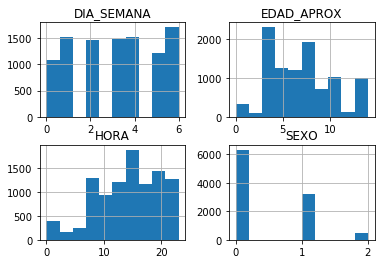

In [100]:
# Draw some the histogram plots
df_accs_lab_sample.drop(['DISTRITO'],1).hist()

plt.show()

In [101]:
df_accs_lab_sample.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


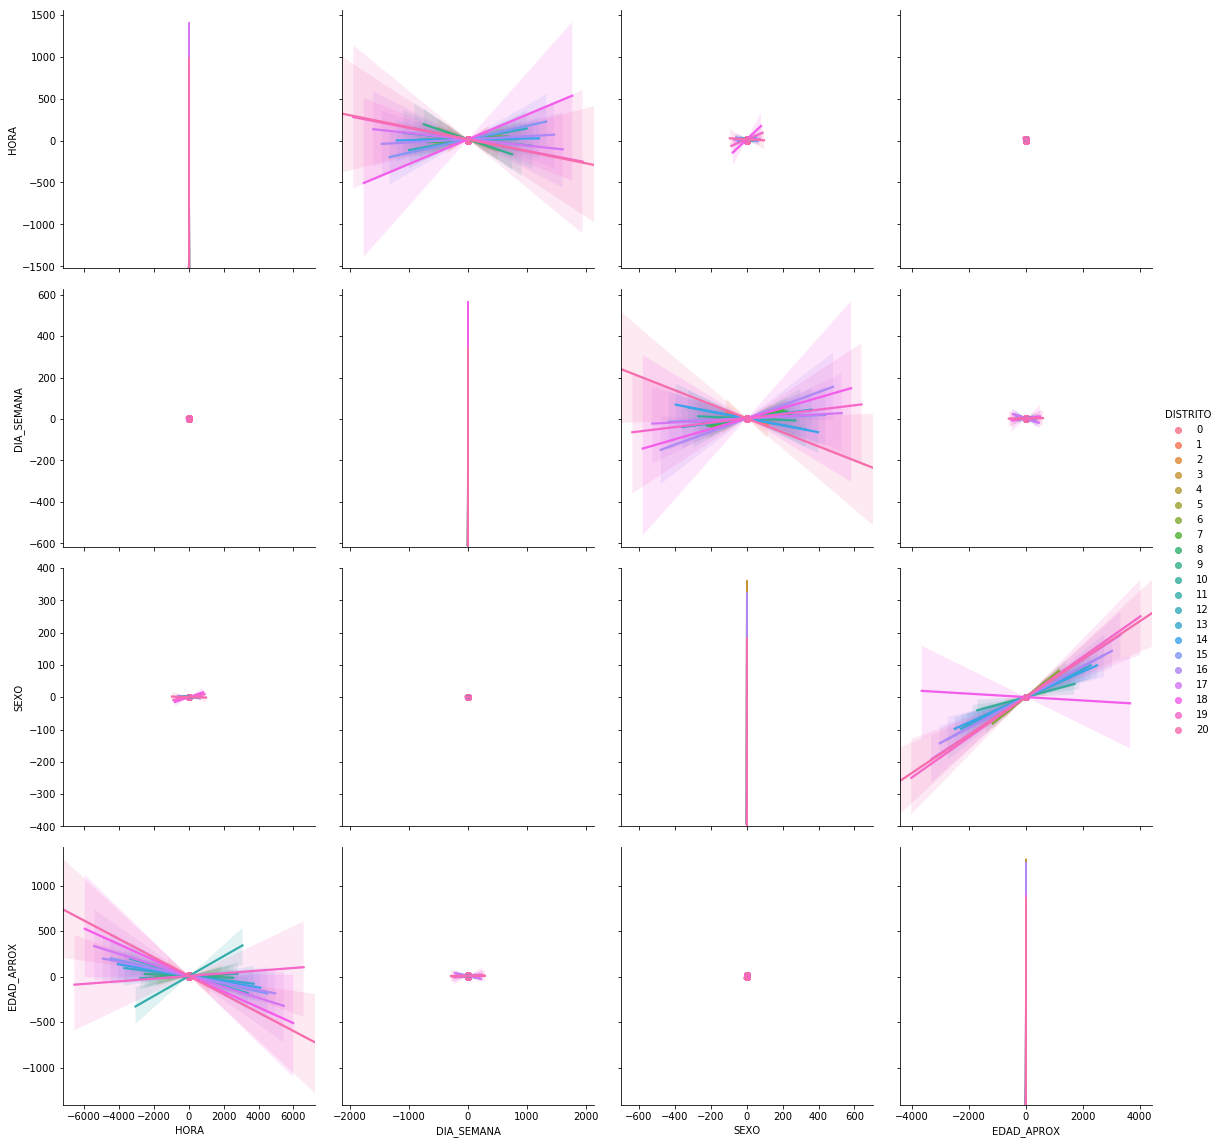

In [102]:
# And we can also see the interrelation using the pairs chart (scatter plot matrix) -> matriz de diagrama de dispersión
# It allows us to see both the distribution of individual variables and the relationships between two variables.
sb.pairplot(df_accs_lab_sample.dropna(), hue='DISTRITO',height=4,vars=['HORA', 'DIA_SEMANA', \
       'SEXO', 'EDAD_APROX'],kind='reg')

In [103]:
df_accs_lab_sample.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

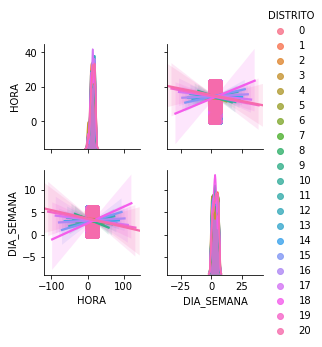

In [104]:
# Others combinations plots
sb.pairplot(df_accs_lab_sample.dropna(), hue='DISTRITO',height=2,vars=['HORA', 'DIA_SEMANA'],kind='reg')

In [105]:
# View data mapping with numbers

In [106]:
df_accs_lab_ohe_sample.groupby(['DISTRITO'], as_index=False).agg(['count'])

,HORA,DIA_SEMANA,SEXO,EDAD_APROX
,count,count,count,count
DISTRITO,,,,
0,523,523,523,523
1,128,128,128,128
2,595,595,595,595
3,698,698,698,698
4,763,763,763,763
5,597,597,597,597
6,657,657,657,657
7,574,574,574,574


In [107]:
df_accs_lab_ohe_sample.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,19:00,JUEVES,8,MUJER,50


In [108]:
df_accs_lab_ohe.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20


In [109]:
df_accs_lab_ohe['HORA']= lab.fit_transform(df_accs_lab_ohe['HORA'])
df_accs_lab_ohe['DIA_SEMANA']= lab.fit_transform(df_accs_lab_ohe['DIA_SEMANA'])
#df_accs_lab_ohe['DISTRITO']= lab.fit_transform(df_accs_lab_ohe['DISTRITO'])
df_accs_lab_ohe['SEXO']= lab.fit_transform(df_accs_lab_ohe['SEXO'])
df_accs_lab_ohe['EDAD_APROX']= lab.fit_transform(df_accs_lab_ohe['EDAD_APROX'])

In [110]:
df_accs_lab_ohe.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,0,6,CHAMARTIN,0,3


In [111]:
# Load variables with sample data.
X = np.array(df_accs_lab_ohe.drop('DISTRITO', 1))
y = np.array(df_accs_lab_ohe["DISTRITO"])
X.shape

(252998, 4)

In [112]:
# Train-test split and load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [113]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [114]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [115]:
df_accs_lab_ohe.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

In [116]:
df_accs_lab_ohe.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,0,6,CHAMARTIN,0,3


In [117]:
df_accs_lab_ohe.shape

(252998, 5)

In [118]:
df_accs_lab_ohe.isnull().sum()

HORA          0
DIA_SEMANA    0
DISTRITO      0
SEXO          0
EDAD_APROX    0
dtype: int64

In [119]:
# Create the encoder (by OneotEncoder)
encoder = OneHotEncoder(handle_unknown='ignore')
# Assume for simplicity all features are categorical.
encoder.fit(X_train)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [120]:
# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [121]:
X.shape

(252998, 4)

In [122]:
X_train

<202398x49 sparse matrix of type '<class 'numpy.float64'>'
	with 809592 stored elements in Compressed Sparse Row format>

In [123]:
X_test

<50600x49 sparse matrix of type '<class 'numpy.float64'>'
	with 202400 stored elements in Compressed Sparse Row format>

### Logistic Regression with SKLearn

In [124]:
# Create teh Regression Logistic model and we make it fit (ajuste) to our set of inputs X and outputs "y".
from sklearn.linear_model.sag import sag_solver
model_LOGREG = linear_model.LogisticRegression(multi_class='auto', solver='sag', verbose=0, max_iter=10000)
model_LOGREG.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
# We classify our entire set of X inputs using the "predict (X)" method for the model
# and we review some of its outputs to see if it matches the actual outputs of our origin
predictions_LOGREG = model_LOGREG.predict(X_test)

In [126]:
# Check prediction classifier

In [127]:
print(predictions_LOGREG[22])

CENTRO


In [128]:
type(predictions_LOGREG)

numpy.ndarray

In [129]:
predictions_LOGREG.dtype

dtype('O')

In [130]:
predictions_LOGREG.shape

(50600,)

In [131]:
# Check model efficiency 

In [132]:
print(accuracy_score(y_test, predictions_LOGREG))

0.08855731225296443


In [133]:
# The Quality of our model, gives us the average accuracy of the predictions
model_LOGREG.score(X_test,y_test)

0.08855731225296443

### WE ADD NEW VARIABLES TO TRY TO IMPROVE THE MODEL

In [134]:
# We incorporate a new csv file, downloaded from the same website

In [135]:
!ls -ltr '../02_Development/distritos_municipio_madrid.csv'

-rw-rw-r-- 1 dsc dsc 1164 nov 22 17:41 ../02_Development/distritos_municipio_madrid.csv


In [136]:
import os
os.getcwd()

'/home/dsc/Repos/TFM_Accident_reduction_plan_in_the_city_of_Madrid/03_Presentation'

In [137]:
df_distritos = pd.read_csv("../02_Development/distritos_municipio_madrid.csv", sep=';', encoding='latin-1')

In [138]:
# Data Preparation

In [139]:
df_distritos.columns

Index(['distrito_codigo', 'distrito_nombre', 'municipio_codigo',
       'municipio_nombre', 'superficie_km2', 'densidad_por_km2'],
      dtype='object')

In [140]:
df_distritos.head(3)

,distrito_codigo,distrito_nombre,municipio_codigo,municipio_nombre,superficie_km2,densidad_por_km2
0,79601,Centro,796,Madrid,5.21,25340.69
1,79602,Arganzuela,796,Madrid,6.52,23306.44
2,79603,Retiro,796,Madrid,5.42,21867.53


In [141]:
drop_elements = ['municipio_codigo', 'municipio_nombre']
df_distritos_lab = df_distritos.drop(drop_elements, axis = 1)

In [142]:
df_distritos_lab.columns

Index(['distrito_codigo', 'distrito_nombre', 'superficie_km2',
       'densidad_por_km2'],
      dtype='object')

In [143]:
df_distritos_lab.head(3)

,distrito_codigo,distrito_nombre,superficie_km2,densidad_por_km2
0,79601,Centro,5.21,25340.69
1,79602,Arganzuela,6.52,23306.44
2,79603,Retiro,5.42,21867.53


In [144]:
df_distritos_lab.dtypes

distrito_codigo       int64
distrito_nombre      object
superficie_km2      float64
densidad_por_km2    float64
dtype: object

In [145]:
df_distritos_lab.shape

(21, 4)

In [146]:
df_accs.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX'], dtype='object')

In [147]:
df_distritos_lab = df_distritos_lab.rename(columns = {'distrito_nombre':'DISTRITO'})

In [148]:
df_distritos_lab.head()

,distrito_codigo,DISTRITO,superficie_km2,densidad_por_km2
0,79601,Centro,5.21,25340.69
1,79602,Arganzuela,6.52,23306.44
2,79603,Retiro,5.42,21867.53
3,79604,Salamanca,5.36,26830.78
4,79605,Chamartín,9.12,15723.25


In [149]:
df_accs.head(3)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20
1,00:00,VIERNES,CHAMARTIN,HOMBRE,50
2,00:00,VIERNES,CHAMARTIN,MUJER,40


In [150]:
df_accs['DISTRITO'].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [151]:
df_distritos_lab['DISTRITO'].unique()

array(['    Centro ', '    Arganzuela ', '    Retiro ', '    Salamanca ',
       '    Chamartín ', '    Tetuan ', '    Chamberí ',
       '    Fuencarral-El Pardo ', '    Moncloa-Aravaca ', '    Latina ',
       '    Carabanchel ', '    Usera ', '    Puente de Vallecas ',
       '    Moratalaz ', '    Ciudad Lineal ', '    Hortaleza ',
       '    Villaverde ', '    Villa de Vallecas ', '    Vicálvaro ',
       '    San Blas-Canillejas ', '    Barajas '], dtype=object)

In [152]:
# Strip leading and trailing space only strings
df_distritos_lab['DISTRITO'] = df_distritos_lab['DISTRITO'].str.strip()


In [153]:
df_distritos_lab['DISTRITO'].unique()

array(['Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartín',
       'Tetuan', 'Chamberí', 'Fuencarral-El Pardo', 'Moncloa-Aravaca',
       'Latina', 'Carabanchel', 'Usera', 'Puente de Vallecas',
       'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde',
       'Villa de Vallecas', 'Vicálvaro', 'San Blas-Canillejas', 'Barajas'],
      dtype=object)

In [154]:
df_accs['DISTRITO'].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [155]:
df_distritos_lab['DISTRITO'] = df_distritos_lab['DISTRITO'].str.upper()

In [156]:
df_distritos_lab['DISTRITO'].unique()

array(['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTÍN',
       'TETUAN', 'CHAMBERÍ', 'FUENCARRAL-EL PARDO', 'MONCLOA-ARAVACA',
       'LATINA', 'CARABANCHEL', 'USERA', 'PUENTE DE VALLECAS',
       'MORATALAZ', 'CIUDAD LINEAL', 'HORTALEZA', 'VILLAVERDE',
       'VILLA DE VALLECAS', 'VICÁLVARO', 'SAN BLAS-CANILLEJAS', 'BARAJAS'],
      dtype=object)

In [157]:
df_accs['DISTRITO'].unique()

array(['CHAMARTIN', 'PUENTE DE VALLECAS', 'CHAMBERI', 'RETIRO',
       'SALAMANCA', 'CARABANCHEL', 'CIUDAD LINEAL', 'MONCLOA-ARAVACA',
       'TETUAN', 'VILLA DE VALLECAS', 'MORATALAZ', 'ARGANZUELA',
       'SAN BLAS', 'VILLAVERDE', 'HORTALEZA', 'FUENCARRAL-EL PARDO',
       'VICALVARO', 'USERA', 'LATINA', 'BARAJAS', 'CENTRO'], dtype=object)

In [158]:
df_distritos_lab["DISTRITO"] = df_distritos_lab["DISTRITO"].replace({"CHAMARTÍN":"CHAMARTIN"}, regex=True)
df_distritos_lab["DISTRITO"] = df_distritos_lab["DISTRITO"].replace({"CHAMBERÍ":"CHAMBERI"}, regex=True)
df_distritos_lab["DISTRITO"] = df_distritos_lab["DISTRITO"].replace({"VICÁLVARO":"VICALVARO"}, regex=True)
df_distritos_lab["DISTRITO"] = df_distritos_lab["DISTRITO"].replace({"SAN BLAS-CANILLEJAS":"SAN BLAS"}, regex=True)

In [159]:
df_distritos_lab['DISTRITO'].unique()

array(['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTIN',
       'TETUAN', 'CHAMBERI', 'FUENCARRAL-EL PARDO', 'MONCLOA-ARAVACA',
       'LATINA', 'CARABANCHEL', 'USERA', 'PUENTE DE VALLECAS',
       'MORATALAZ', 'CIUDAD LINEAL', 'HORTALEZA', 'VILLAVERDE',
       'VILLA DE VALLECAS', 'VICALVARO', 'SAN BLAS', 'BARAJAS'],
      dtype=object)

In [160]:
df_distritos_lab.columns

Index(['distrito_codigo', 'DISTRITO', 'superficie_km2', 'densidad_por_km2'], dtype='object')

In [161]:
df_distritos_lab['distrito_codigo'].unique()

array([79601, 79602, 79603, 79604, 79605, 79606, 79607, 79608, 79609,
       79610, 79611, 79612, 79613, 79614, 79615, 79616, 79617, 79618,
       79619, 79620, 79621])

In [162]:
df_distritos_lab['superficie_km2'].unique()

array([  5.21,   6.52,   5.42,   5.36,   9.12,   5.37,   4.73, 238.  ,
        46.47,  25.47,  14.1 ,   7.7 ,  14.84,   6.08,  11.52,  25.87,
        20.21,  51.49,  35.36,  22.26,  43.56])

In [163]:
df_distritos_lab['densidad_por_km2'].unique()

array([25340.69, 23306.44, 21867.53, 26830.78, 15723.25, 28664.25,
       29049.26,  1003.  ,  2515.26,  9183.75, 17316.88, 17535.32,
       15345.01, 15493.59, 18455.56,  6973.33,  7059.13,  2026.82,
        1981.11,  6934.37,  1076.06])

In [164]:
# Check NULL values
df_distritos_lab.isnull().sum()

distrito_codigo     0
DISTRITO            0
superficie_km2      0
densidad_por_km2    0
dtype: int64

In [165]:
# We add to our original dataframe the columns that serve us of the new file to identify our dependent variable

In [166]:
from functools import reduce
df_accs_join_dist = [df_accs_lab_ohe, df_distritos_lab]
df_accs_join_dist = reduce(lambda left,right: pd.merge(left,right, on=['DISTRITO']), df_accs_join_dist)
df_accs_join_dist

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX,distrito_codigo,superficie_km2,densidad_por_km2
0,0,6,CHAMARTIN,0,3,79605,9.12,15723.25
1,0,6,CHAMARTIN,0,9,79605,9.12,15723.25
2,0,6,CHAMARTIN,1,7,79605,9.12,15723.25
3,20,0,CHAMARTIN,2,14,79605,9.12,15723.25
4,20,0,CHAMARTIN,0,8,79605,9.12,15723.25
...,...,...,...,...,...,...,...,...
252993,16,0,CENTRO,0,9,79601,5.21,25340.69
252994,21,2,CENTRO,0,9,79601,5.21,25340.69
252995,21,2,CENTRO,0,5,79601,5.21,25340.69
252996,21,2,CENTRO,1,4,79601,5.21,25340.69


In [167]:
df_accs_join_dist.shape

(252998, 8)

In [168]:
df_accs_join_dist.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX',
       'distrito_codigo', 'superficie_km2', 'densidad_por_km2'],
      dtype='object')

In [169]:
df_accs_join_dist = df_accs_join_dist.rename(columns = {'distrito_codigo':'COD_DISTRITO'})
df_accs_join_dist = df_accs_join_dist.rename(columns = {'superficie_km2':'SUP_KM2'})
df_accs_join_dist = df_accs_join_dist.rename(columns = {'densidad_por_km2':'DENSIDAD_KM2'})

In [170]:
df_accs_join_dist.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX', 'COD_DISTRITO',
       'SUP_KM2', 'DENSIDAD_KM2'],
      dtype='object')

In [171]:
df_accs_join_dist["COD_DISTRITO"].unique()

array([79605, 79613, 79607, 79603, 79604, 79611, 79615, 79609, 79606,
       79618, 79614, 79602, 79620, 79617, 79616, 79608, 79619, 79612,
       79610, 79621, 79601])

In [172]:
df_accs_join_dist["SUP_KM2"].unique()

array([  9.12,  14.84,   4.73,   5.42,   5.36,  14.1 ,  11.52,  46.47,
         5.37,  51.49,   6.08,   6.52,  22.26,  20.21,  25.87, 238.  ,
        35.36,   7.7 ,  25.47,  43.56,   5.21])

In [173]:
df_accs_join_dist["DENSIDAD_KM2"].unique()

array([15723.25, 15345.01, 29049.26, 21867.53, 26830.78, 17316.88,
       18455.56,  2515.26, 28664.25,  2026.82, 15493.59, 23306.44,
        6934.37,  7059.13,  6973.33,  1003.  ,  1981.11, 17535.32,
        9183.75,  1076.06, 25340.69])

In [174]:
df_accs_join_dist.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX', 'COD_DISTRITO',
       'SUP_KM2', 'DENSIDAD_KM2'],
      dtype='object')

In [175]:
df_inf_xa_dis = df_accs_join_dist.reset_index(drop=True).copy()

In [176]:
df_inf_xa_dis.dtypes

HORA              int64
DIA_SEMANA        int64
DISTRITO         object
SEXO              int64
EDAD_APROX        int64
COD_DISTRITO      int64
SUP_KM2         float64
DENSIDAD_KM2    float64
dtype: object

In [177]:
# Convert to object columns (the numeric columns)
df_inf_xa_dis["COD_DISTRITO"]=df_inf_xa_dis['COD_DISTRITO'].astype(np.str)
df_inf_xa_dis["SUP_KM2"]=df_inf_xa_dis['SUP_KM2'].astype(np.str)
df_inf_xa_dis["DENSIDAD_KM2"]=df_inf_xa_dis['DENSIDAD_KM2'].astype(np.str)

In [178]:
df_inf_xa_dis.dtypes

HORA             int64
DIA_SEMANA       int64
DISTRITO        object
SEXO             int64
EDAD_APROX       int64
COD_DISTRITO    object
SUP_KM2         object
DENSIDAD_KM2    object
dtype: object

In [179]:
df_inf_xa_dis.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX', 'COD_DISTRITO',
       'SUP_KM2', 'DENSIDAD_KM2'],
      dtype='object')

In [180]:
# Load variables
X = np.array(df_inf_xa_dis.drop(['DISTRITO'],1))
y = np.array(df_inf_xa_dis['DISTRITO'])
X.shape

# Train-test split and load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [181]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
# Assume for simplicity all features are categorical.
encoder.fit(X_train)    

# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [182]:
X.shape

(252998, 7)

In [183]:
X[0]

array([0, 6, 0, 3, '79605', '9.12', '15723.25'], dtype=object)

In [184]:
X_train

<202398x112 sparse matrix of type '<class 'numpy.float64'>'
	with 1416786 stored elements in Compressed Sparse Row format>

In [185]:
X_test

<50600x112 sparse matrix of type '<class 'numpy.float64'>'
	with 354200 stored elements in Compressed Sparse Row format>

### Logistic Regression with SKLearn (2)

In [186]:
# Create teh Regression Logistic model and we make it fit (ajuste) to our set of inputs X and outputs "y".
from sklearn.linear_model.sag import sag_solver
model_LOGREG = linear_model.LogisticRegression(multi_class='auto', solver='sag')
model_LOGREG.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [187]:
# We classify our entire set of X inputs using the "predict (X)" method for the model
#   and we review some of its outputs to see if it matches the actual outputs of our origin
predictions_LOGREG = model_LOGREG.predict(X_test)

In [188]:
# Check model efficiency 
print(predictions_LOGREG[22])

LATINA


In [189]:
type(predictions_LOGREG)

numpy.ndarray

In [190]:
predictions_LOGREG.dtype

dtype('O')

In [191]:
predictions_LOGREG.shape

(50600,)

In [192]:
print(accuracy_score(y_test, predictions_LOGREG))

1.0


In [193]:
# The Quality of our model, gives us the average accuracy of the predictions:
model_LOGREG.score(X_test,y_test)

1.0

In [194]:
y_test.dtype

dtype('O')

In [195]:
len(y_test)

50600

In [196]:
y_test.shape

(50600,)

In [197]:
y_test[22,]

'LATINA'

########################################################

##########################################

############################

## VALIDATE MODEL

In [198]:
df_inf_xa_dis.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX', 'COD_DISTRITO',
       'SUP_KM2', 'DENSIDAD_KM2'],
      dtype='object')

In [199]:
df_inf_xa_dis.dtypes

HORA             int64
DIA_SEMANA       int64
DISTRITO        object
SEXO             int64
EDAD_APROX       int64
COD_DISTRITO    object
SUP_KM2         object
DENSIDAD_KM2    object
dtype: object

In [200]:
df_inf_xa_dis.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX,COD_DISTRITO,SUP_KM2,DENSIDAD_KM2
0,0,6,CHAMARTIN,0,3,79605,9.12,15723.25


In [201]:
# We recompile our Logistic Regression model, at 80% of the input data in 10 partitions 
# and we calculate the new scoring by cross validation
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model_LOGREG, X_train, y_train, cv=kfold, \
                                             scoring='accuracy', error_score=np.nan, verbose=0)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 1.000000 (0.000000)


In [202]:
# And now we make the predictions (really classification) using our "cross validation set"
# that is to say of the subset that we had separated.
# Successes: xxx%
predictions_LOGREG = model_LOGREG.predict(X_test)
print(accuracy_score(y_test, predictions_LOGREG))

1.0


# Model results

In [203]:
## Matrix of confusion for errors
print(confusion_matrix(y_test, predictions_LOGREG))

[[2584    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0  662    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0 3138    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0 3396    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0 3833    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0 2886    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 3348    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 2750    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 1723    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    

In [204]:
## Classification report with our TEST set
# We observe the average F1-score
print(classification_report(y_test, predictions_LOGREG))

                     precision    recall  f1-score   support

         ARGANZUELA       1.00      1.00      1.00      2584
            BARAJAS       1.00      1.00      1.00       662
        CARABANCHEL       1.00      1.00      1.00      3138
             CENTRO       1.00      1.00      1.00      3396
          CHAMARTIN       1.00      1.00      1.00      3833
           CHAMBERI       1.00      1.00      1.00      2886
      CIUDAD LINEAL       1.00      1.00      1.00      3348
FUENCARRAL-EL PARDO       1.00      1.00      1.00      2750
          HORTALEZA       1.00      1.00      1.00      1723
             LATINA       1.00      1.00      1.00      2458
    MONCLOA-ARAVACA       1.00      1.00      1.00      2776
          MORATALAZ       1.00      1.00      1.00      1230
 PUENTE DE VALLECAS       1.00      1.00      1.00      3252
             RETIRO       1.00      1.00      1.00      2783
          SALAMANCA       1.00      1.00      1.00      3804
           SAN BLAS    

# Classification (or prediction) of new values

In [205]:
df_inf_xa_dis.columns

Index(['HORA', 'DIA_SEMANA', 'DISTRITO', 'SEXO', 'EDAD_APROX', 'COD_DISTRITO',
       'SUP_KM2', 'DENSIDAD_KM2'],
      dtype='object')

In [206]:
df_inf_xa_dis.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX,COD_DISTRITO,SUP_KM2,DENSIDAD_KM2
0,0,6,CHAMARTIN,0,3,79605,9.12,15723.25


In [207]:
df_accs.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20


In [208]:
# Test and others parameters:
# a.- predict: just gives you the class for every example
# b.- predict_proba: gives you the probability for every class, and predict is just taking the class 
#     which maximal probability
# c.- predict_log_proba: gives you the logarithm of the probabilities, this is often handier as probabilities 
#     can become very, very small shareimprove this answer
# d.- coef_
# e.- score
# f.- decision function

In [209]:
model_LOGREG.predict(X_test)

array(['CIUDAD LINEAL', 'MORATALAZ', 'FUENCARRAL-EL PARDO', ...,
       'FUENCARRAL-EL PARDO', 'VILLAVERDE', 'ARGANZUELA'], dtype=object)

In [210]:
model_LOGREG.predict_proba(X_test)

array([[1.37008573e-05, 1.27918599e-05, 1.31019272e-05, ...,
        1.21610115e-05, 1.30014587e-05, 1.29355622e-05],
       [3.43024826e-05, 3.32815976e-05, 3.34283774e-05, ...,
        3.02076770e-05, 3.07976116e-05, 3.21010765e-05],
       [1.75940103e-05, 1.51480310e-05, 1.75150710e-05, ...,
        1.57524778e-05, 1.64833299e-05, 1.70275268e-05],
       ...,
       [1.70802314e-05, 1.48037208e-05, 1.60843263e-05, ...,
        1.59384810e-05, 1.55810431e-05, 1.54739484e-05],
       [3.19958490e-05, 2.71550405e-05, 3.11206997e-05, ...,
        2.88966349e-05, 2.99836324e-05, 9.99388734e-01],
       [9.99668759e-01, 1.51501000e-05, 1.73680545e-05, ...,
        1.67328826e-05, 1.57924638e-05, 1.64211445e-05]])

In [211]:
model_LOGREG.predict_log_proba(X_test)

array([[-1.11980522e+01, -1.12667015e+01, -1.12427512e+01, ...,
        -1.13172755e+01, -1.12504490e+01, -1.12555303e+01],
       [-1.02802928e+01, -1.03105059e+01, -1.03061054e+01, ...,
        -1.04074145e+01, -1.03880734e+01, -1.03466210e+01],
       [-1.09479520e+01, -1.10976400e+01, -1.09524488e+01, ...,
        -1.10585129e+01, -1.10131610e+01, -1.09806793e+01],
       ...,
       [-1.09775888e+01, -1.11206320e+01, -1.10376653e+01, ...,
        -1.10467742e+01, -1.10694556e+01, -1.10763527e+01],
       [-1.03499044e+01, -1.05139479e+01, -1.03776374e+01, ...,
        -1.04517854e+01, -1.04148589e+01, -6.11452986e-04],
       [-3.31295534e-04, -1.10975034e+01, -1.09608780e+01, ...,
        -1.09981348e+01, -1.10559777e+01, -1.10169408e+01]])

In [212]:
model_LOGREG.coef_

array([[ 2.14418109e-03, -1.26637868e-03, -5.72047569e-03, ...,
        -1.73239807e-01, -1.70044270e-01, -1.78368725e-01],
       [-2.48233748e-02, -3.82366787e-02, -8.89693549e-03, ...,
        -1.58359891e-01, -1.54681280e-01, -1.62620145e-01],
       [ 2.50575322e-02,  2.16171470e-02,  7.46608462e-03, ...,
        -1.69590311e-01, -1.66899901e-01, -1.74984147e-01],
       ...,
       [-3.21321547e-02, -3.03392935e-04,  7.27704256e-03, ...,
        -1.59451225e-01, -1.56255661e-01, -1.64118498e-01],
       [ 3.90308265e-03, -9.96244982e-03, -6.92010283e-03, ...,
        -1.63082054e-01, -1.60027963e-01, -1.67831923e-01],
       [-7.21404419e-03, -7.75390987e-03, -1.10681874e-02, ...,
        -1.64640968e-01,  3.30946844e+00, -1.69678859e-01]])

In [213]:
model_LOGREG.score

<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)>

In [214]:
df_inf_xa_dis.dtypes

HORA             int64
DIA_SEMANA       int64
DISTRITO        object
SEXO             int64
EDAD_APROX       int64
COD_DISTRITO    object
SUP_KM2         object
DENSIDAD_KM2    object
dtype: object

In [215]:
predictions_LOGREG[22]

'LATINA'

In [216]:
y_test[22]

'LATINA'

In [217]:
model_LOGREG.predict_proba(X_test)[22:23,]

array([[1.81027177e-05, 1.79440127e-05, 1.81051665e-05, 1.73460183e-05,
        1.98351893e-05, 1.77757001e-05, 1.87190662e-05, 1.87386624e-05,
        1.83323794e-05, 9.99633072e-01, 1.90853745e-05, 1.81478602e-05,
        1.89513771e-05, 1.91600520e-05, 1.91678961e-05, 1.89107454e-05,
        1.85423476e-05, 1.74742347e-05, 1.79890309e-05, 1.73374297e-05,
        1.72631379e-05]])

In [218]:
model_LOGREG.decision_function(X_test)

array([[-0.52007287, -0.58872225, -0.56477194, ..., -0.63929622,
        -0.57246972, -0.57755099],
       [-0.44436998, -0.47458309, -0.47018254, ..., -0.57149161,
        -0.55215056, -0.51069814],
       [-0.48078885, -0.63047681, -0.48528566, ..., -0.59134969,
        -0.54599781, -0.51351611],
       ...,
       [-0.46967634, -0.61271952, -0.5297528 , ..., -0.5388617 ,
        -0.56154308, -0.56844021],
       [-0.44811428, -0.61215777, -0.47584727, ..., -0.5499953 ,
        -0.51306881,  9.90117865],
       [10.48456077, -0.61261136, -0.47598592, ..., -0.51324269,
        -0.57108565, -0.53204869]])

In [219]:
model_LOGREG.classes_

array(['ARGANZUELA', 'BARAJAS', 'CARABANCHEL', 'CENTRO', 'CHAMARTIN',
       'CHAMBERI', 'CIUDAD LINEAL', 'FUENCARRAL-EL PARDO', 'HORTALEZA',
       'LATINA', 'MONCLOA-ARAVACA', 'MORATALAZ', 'PUENTE DE VALLECAS',
       'RETIRO', 'SALAMANCA', 'SAN BLAS', 'TETUAN', 'USERA', 'VICALVARO',
       'VILLA DE VALLECAS', 'VILLAVERDE'], dtype=object)

In [220]:
pd.DataFrame(model_LOGREG.predict_proba(X_test), columns=model_LOGREG.classes_)

,ARGANZUELA,BARAJAS,CARABANCHEL,CENTRO,CHAMARTIN,CHAMBERI,CIUDAD LINEAL,FUENCARRAL-EL PARDO,HORTALEZA,LATINA,MONCLOA-ARAVACA,MORATALAZ,PUENTE DE VALLECAS,RETIRO,SALAMANCA,SAN BLAS,TETUAN,USERA,VICALVARO,VILLA DE VALLECAS,VILLAVERDE
0,0.000014,0.000013,0.000013,0.000014,0.000014,0.000014,0.999729,0.000014,0.000013,0.000013,0.000014,0.000013,0.000014,0.000014,0.000014,0.000013,0.000014,0.000013,0.000012,0.000013,0.000013
1,0.000034,0.000033,0.000033,0.000034,0.000033,0.000033,0.000034,0.000032,0.000033,0.000033,0.000032,0.999345,0.000034,0.000033,0.000034,0.000034,0.000032,0.000030,0.000030,0.000031,0.000032
2,0.000018,0.000015,0.000018,0.000018,0.000017,0.000018,0.000017,0.999662,0.000016,0.000016,0.000017,0.000016,0.000017,0.000017,0.000018,0.000017,0.000018,0.000016,0.000016,0.000016,0.000017
3,0.000011,0.000011,0.000011,0.000011,0.000012,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000010,0.000011,0.000012,0.999779,0.000011,0.000012,0.000011,0.000010,0.000010,0.000011
4,0.000017,0.000015,0.000017,0.000017,0.000016,0.000017,0.000016,0.999674,0.000016,0.000017,0.000017,0.000015,0.000016,0.000017,0.000017,0.000017,0.000017,0.000016,0.000015,0.000016,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50595,0.999656,0.000017,0.000017,0.000018,0.000017,0.000018,0.000017,0.000017,0.000017,0.000017,0.000018,0.000017,0.000018,0.000017,0.000018,0.000017,0.000017,0.000016,0.000016,0.000016,0.000018
50596,0.000017,0.000015,0.000016,0.000016,0.000016,0.000016,0.000017,0.000015,0.000015,0.000016,0.000016,0.000015,0.000016,0.999685,0.000017,0.000016,0.000016,0.000015,0.000015,0.000015,0.000015
50597,0.000017,0.000015,0.000016,0.000017,0.000017,0.000016,0.000016,0.999677,0.000016,0.000016,0.000016,0.000015,0.000016,0.000017,0.000017,0.000016,0.000017,0.000015,0.000016,0.000016,0.000015
50598,0.000032,0.000027,0.000031,0.000032,0.000032,0.000032,0.000030,0.000030,0.000029,0.000030,0.000032,0.000030,0.000031,0.000033,0.000032,0.000030,0.000032,0.000029,0.000029,0.000030,0.999389


In [221]:
pd.DataFrame(model_LOGREG.predict_proba(X_test), columns=model_LOGREG.classes_).head(5)

,ARGANZUELA,BARAJAS,CARABANCHEL,CENTRO,CHAMARTIN,CHAMBERI,CIUDAD LINEAL,FUENCARRAL-EL PARDO,HORTALEZA,LATINA,MONCLOA-ARAVACA,MORATALAZ,PUENTE DE VALLECAS,RETIRO,SALAMANCA,SAN BLAS,TETUAN,USERA,VICALVARO,VILLA DE VALLECAS,VILLAVERDE
0,0.000014,0.000013,0.000013,0.000014,0.000014,0.000014,0.999729,0.000014,0.000013,0.000013,0.000014,0.000013,0.000014,0.000014,0.000014,0.000013,0.000014,0.000013,0.000012,0.000013,0.000013
1,0.000034,0.000033,0.000033,0.000034,0.000033,0.000033,0.000034,0.000032,0.000033,0.000033,0.000032,0.999345,0.000034,0.000033,0.000034,0.000034,0.000032,0.000030,0.000030,0.000031,0.000032
2,0.000018,0.000015,0.000018,0.000018,0.000017,0.000018,0.000017,0.999662,0.000016,0.000016,0.000017,0.000016,0.000017,0.000017,0.000018,0.000017,0.000018,0.000016,0.000016,0.000016,0.000017
3,0.000011,0.000011,0.000011,0.000011,0.000012,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000010,0.000011,0.000012,0.999779,0.000011,0.000012,0.000011,0.000010,0.000010,0.000011
4,0.000017,0.000015,0.000017,0.000017,0.000016,0.000017,0.000016,0.999674,0.000016,0.000017,0.000017,0.000015,0.000016,0.000017,0.000017,0.000017,0.000017,0.000016,0.000015,0.000016,0.000016


In [222]:
pd.DataFrame(model_LOGREG.predict_proba(X_test))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.000014,0.000013,0.000013,0.000014,0.000014,0.000014,0.999729,0.000014,0.000013,0.000013,0.000014,0.000013,0.000014,0.000014,0.000014,0.000013,0.000014,0.000013,0.000012,0.000013,0.000013
1,0.000034,0.000033,0.000033,0.000034,0.000033,0.000033,0.000034,0.000032,0.000033,0.000033,0.000032,0.999345,0.000034,0.000033,0.000034,0.000034,0.000032,0.000030,0.000030,0.000031,0.000032
2,0.000018,0.000015,0.000018,0.000018,0.000017,0.000018,0.000017,0.999662,0.000016,0.000016,0.000017,0.000016,0.000017,0.000017,0.000018,0.000017,0.000018,0.000016,0.000016,0.000016,0.000017
3,0.000011,0.000011,0.000011,0.000011,0.000012,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000010,0.000011,0.000012,0.999779,0.000011,0.000012,0.000011,0.000010,0.000010,0.000011
4,0.000017,0.000015,0.000017,0.000017,0.000016,0.000017,0.000016,0.999674,0.000016,0.000017,0.000017,0.000015,0.000016,0.000017,0.000017,0.000017,0.000017,0.000016,0.000015,0.000016,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50595,0.999656,0.000017,0.000017,0.000018,0.000017,0.000018,0.000017,0.000017,0.000017,0.000017,0.000018,0.000017,0.000018,0.000017,0.000018,0.000017,0.000017,0.000016,0.000016,0.000016,0.000018
50596,0.000017,0.000015,0.000016,0.000016,0.000016,0.000016,0.000017,0.000015,0.000015,0.000016,0.000016,0.000015,0.000016,0.999685,0.000017,0.000016,0.000016,0.000015,0.000015,0.000015,0.000015
50597,0.000017,0.000015,0.000016,0.000017,0.000017,0.000016,0.000016,0.999677,0.000016,0.000016,0.000016,0.000015,0.000016,0.000017,0.000017,0.000016,0.000017,0.000015,0.000016,0.000016,0.000015
50598,0.000032,0.000027,0.000031,0.000032,0.000032,0.000032,0.000030,0.000030,0.000029,0.000030,0.000032,0.000030,0.000031,0.000033,0.000032,0.000030,0.000032,0.000029,0.000029,0.000030,0.999389


In [223]:
predictions_LOGREG[0]

'CIUDAD LINEAL'

In [224]:
predictions_LOGREG[1]

'MORATALAZ'

In [225]:
# For decode test patterns (just create a copy before transformation)
# add probability by index
# eliminate surface and density (although they would be worth us for other calculations)

In [226]:
df_accs.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,00:00,VIERNES,CHAMARTIN,HOMBRE,20


In [227]:
df_accs_lab_ohe.head(1)

,HORA,DIA_SEMANA,DISTRITO,SEXO,EDAD_APROX
0,0,6,CHAMARTIN,0,3


In [228]:
######### Visual tests

In [229]:
#del visual
#del visual_sample

In [230]:
visual = pd.DataFrame(model_LOGREG.predict_proba(X_test), columns=model_LOGREG.classes_)
visual_sample = visual.sample(n=5000).reset_index(drop=True)

In [231]:
df_accs["DIA_SEMANA"].unique()

array(['VIERNES', 'SABADO', 'DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES',
       'JUEVES'], dtype=object)

In [232]:
# Categorical scatterplots:

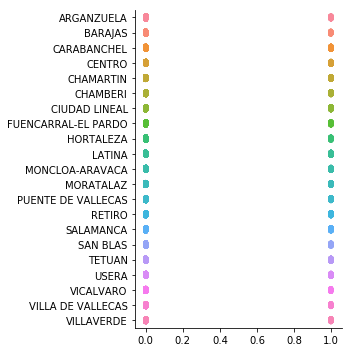

In [233]:
sb.catplot(data=visual_sample,kind="strip", orient="h"
          )

In [234]:
# Categorical distribution plots:

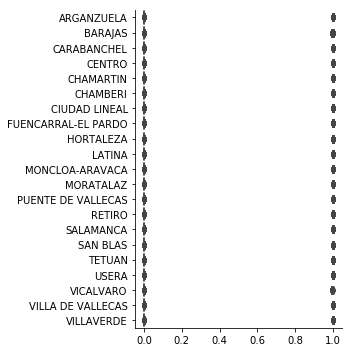

In [235]:
sb.catplot(data=visual_sample,kind="box", orient="h"
          )

/home/dsc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


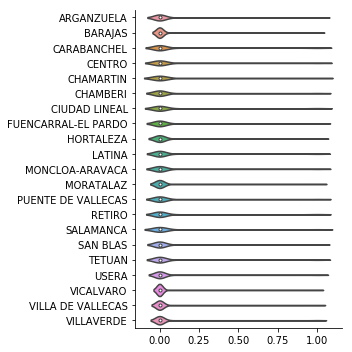

In [236]:
sb.catplot(data=visual_sample,kind="violin", orient="h"
          )

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

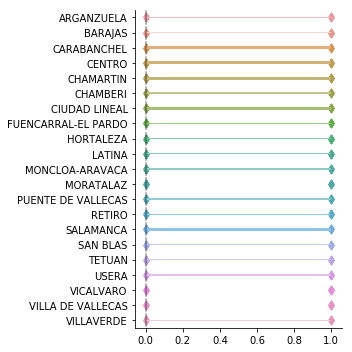

In [237]:
sb.catplot(data=visual_sample,kind="boxen", orient="h"
          )

In [238]:
# Categorical estimate plots:

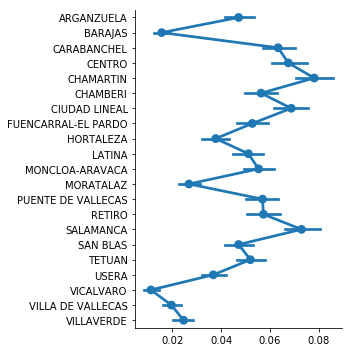

In [239]:
sb.catplot(data=visual_sample,kind="point", orient="h"
          )

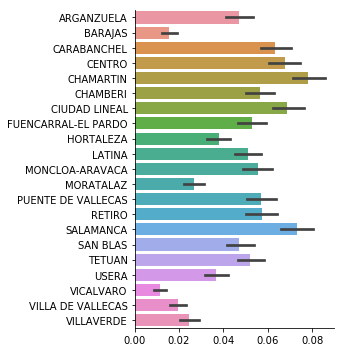

In [240]:
sb.catplot(data=visual_sample,kind="bar", orient="h"
          )

In [241]:
X_test.shape

(50600, 112)

In [242]:
visual_sample.columns

Index(['ARGANZUELA', 'BARAJAS', 'CARABANCHEL', 'CENTRO', 'CHAMARTIN',
       'CHAMBERI', 'CIUDAD LINEAL', 'FUENCARRAL-EL PARDO', 'HORTALEZA',
       'LATINA', 'MONCLOA-ARAVACA', 'MORATALAZ', 'PUENTE DE VALLECAS',
       'RETIRO', 'SALAMANCA', 'SAN BLAS', 'TETUAN', 'USERA', 'VICALVARO',
       'VILLA DE VALLECAS', 'VILLAVERDE'],
      dtype='object')

In [243]:
### CHIMPUM FINAL

In [244]:
!date

dom dic  1 22:45:59 CET 2019
